In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import ElasticNet
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from sklearn.decomposition import PCA
import nltk.tokenize
from nltk.probability import FreqDist
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Audio Features

### With genre features, no regularization

In [ ]:
# Manually uploading df_hamadani_preprocessed.csv

df_audio = pd.read_csv("/content/df_hamadani_preprocessed.csv")

# Drop 2 columns - track_id and unnamed:0
df_audio.drop(columns=['track_id', 'Unnamed: 0'], inplace=True)

df_audio

,song_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_popularity,Reggaeton,Indie,Children’s Music,Movie,Rock,Hip-Hop,Alternative,R&B,Blues,Anime,Reggae,Folk,Opera,Dance,Jazz,Ska,A Capella,Soundtrack,Classical,Pop,Children's Music,Soul,World,Country,Electronic,Rap,Comedy
0,9,0.5020,0.379,174693,0.368,0.000000,5,0.0608,-11.600,1,0.0305,132.693,3,0.2520,54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0.1100,0.488,122533,0.573,0.000000,11,0.4850,-8.111,1,0.0822,78.415,3,0.7870,54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.9250,0.789,160333,0.437,0.000321,6,0.1350,-11.432,0,0.1290,110.281,3,0.8070,54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.3090,0.586,157387,0.569,0.000000,8,0.1430,-7.806,0,0.0322,120.736,3,0.9410,54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,0.3600,0.654,150027,0.427,0.000000,2,0.1500,-7.963,1,0.0379,125.390,3,0.8110,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,36,0.9920,0.311,91387,0.116,0.204000,11,0.1420,-15.397,1,0.0360,136.888,2,0.3570,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10866,31,0.0208,0.479,121467,0.855,0.000035,2,0.3430,-4.926,0,0.0740,105.337,3,0.5890,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10867,0,0.8870,0.229,144707,0.243,0.000105,4,0.0895,-14.259,0,0.0317,143.791,2,0.2170,49,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10868,36,0.8200,0.434,222533,0.129,0.000000,11,0.1240,-12.480,1,0.0321,138.874,3,0.3460,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Create one df of samples and another of the labels
X = df_audio.drop(columns=["song_popularity"])
y = df_audio[['song_popularity']]

# split into training and test_sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create linear regression object
linreg = linear_model.LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Made predictions
y_pred = linreg.predict(X_test)

In [ ]:
# MSE and RMSE
print("Model w/out regularization and with Genre features\n")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", linreg.score(X_test, y_test))

Model w/out regularization and with Genre features

MSE: 60.088679688065945
RMSE: 7.751688828124227
R2 score: 0.6889679733501065


(-1.0, 100.0)

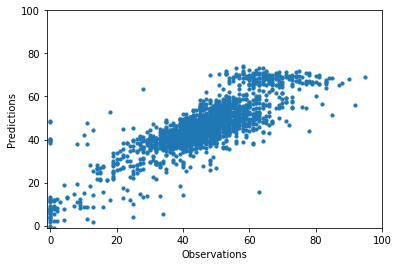

In [ ]:
plt.scatter(y_test, y_pred, s=10)
plt.ylabel("Predictions")
plt.xlabel("Observations")
plt.xlim(-1,100)
plt.ylim(-1,100)



### With genre features, L1 regularization

This performs slightly worse than model without regularization

In [ ]:
# Testing several different alphas
for alpha_val in [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5]:
                  
  # Create linear regression object
  linreg = linear_model.Lasso(alpha=alpha_val)

  # Standardize the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Fit the model
  linreg.fit(X_train_scaled, y_train)

  # Made predictions
  y_pred = linreg.predict(X_test_scaled)


  # MSE and RMSE
  print("\n\nALPHA =", alpha_val)
  print("Model w/out regularization and with Genre features")
  print("MSE:", mean_squared_error(y_test, y_pred))
  print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
  print("R2 score:", linreg.score(X_test_scaled, y_test))



ALPHA = 0.1
Model w/out regularization and with Genre features
MSE: 60.65951785485103
RMSE: 7.788422038824748
R2 score: 0.686013191304204


ALPHA = 0.2
Model w/out regularization and with Genre features
MSE: 61.4833714347929
RMSE: 7.841133300409635
R2 score: 0.6817487466540252


ALPHA = 0.3
Model w/out regularization and with Genre features
MSE: 62.68989752330743
RMSE: 7.917695215358282
R2 score: 0.6755035061783691


ALPHA = 0.4
Model w/out regularization and with Genre features
MSE: 64.1353928873631
RMSE: 8.008457584788914
R2 score: 0.6680213089503853


ALPHA = 0.5
Model w/out regularization and with Genre features
MSE: 65.87538614930081
RMSE: 8.116365328723246
R2 score: 0.6590147267883689


ALPHA = 0.75
Model w/out regularization and with Genre features
MSE: 71.43196020946671
RMSE: 8.451743027888787
R2 score: 0.6302526954018335


ALPHA = 1
Model w/out regularization and with Genre features
MSE: 77.27857278780631
RMSE: 8.790823214455306
R2 score: 0.5999893617969367


ALPHA = 1.5
Mod


### With genre features, L2 regularization

L2 regularization performs slightly **worse** than without regularization -- measured by both RMSE and R2 score


In [ ]:
# Testing several different alphas
for alpha_val in [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5]:
                  
  # Create linear regression object
  linreg = linear_model.Ridge(alpha=alpha_val)

  # Standardize the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Fit the model
  linreg.fit(X_train_scaled, y_train)

  # Made predictions
  y_pred = linreg.predict(X_test_scaled)


  # MSE and RMSE
  print("\n\nALPHA =", alpha_val)
  print("Model w/out regularization and with Genre features")
  print("MSE:", mean_squared_error(y_test, y_pred))
  print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
  print("R2 score:", linreg.score(X_test_scaled, y_test))



ALPHA = 0.1
Model w/out regularization and with Genre features
MSE: 60.088692132043924
RMSE: 7.751689630786563
R2 score: 0.68896790893738


ALPHA = 0.2
Model w/out regularization and with Genre features
MSE: 60.08870460618017
RMSE: 7.751690435394087
R2 score: 0.6889678443685477


ALPHA = 0.3
Model w/out regularization and with Genre features
MSE: 60.08871711051287
RMSE: 7.751691241949261
R2 score: 0.6889677796434122


ALPHA = 0.4
Model w/out regularization and with Genre features
MSE: 60.08872964503586
RMSE: 7.751692050451686
R2 score: 0.688967714762005


ALPHA = 0.5
Model w/out regularization and with Genre features
MSE: 60.088742209743
RMSE: 7.751692860900966
R2 score: 0.6889676497243582


ALPHA = 0.75
Model w/out regularization and with Genre features
MSE: 60.08877375352635
RMSE: 7.751694895539062
R2 score: 0.6889674864469003


ALPHA = 1
Model w/out regularization and with Genre features
MSE: 60.08880548582659
RMSE: 7.751696942336342
R2 score: 0.6889673221936383


ALPHA = 1.5
Mode

## W/o Genre, no regularization
- This is much worse after dropping genre. I also tried doing L1 and L2 regularization but it was similarly bad

In [ ]:
# Drop genre columns
X_no_genre = X[X.columns[0:14]]

# split into training and test_sets
X_train, X_test, y_train, y_test = train_test_split(X_no_genre, y, test_size=0.2, random_state=42)

In [ ]:
# Create linear regression object
linreg = linear_model.LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Made predictions
y_pred = linreg.predict(X_test)

# MSE and RMSE
print("Model w/out regularization and with Genre features\n")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", linreg.score(X_test, y_test))

Model w/out regularization and with Genre features

MSE: 135.06200470178976
RMSE: 11.621617989840733
R2 score: 0.3008897971486244


## Dropping artist popularity
The previous literature would suggest that artist popularity is giving us a big boost to our predictive power. What if I take our best model (Vanilla LinReg w/ genre features included) and change it by ONLY removing artist popularity

**Answer:** It makes it worse, but surprisingly not by much

In [ ]:
# Change normal process by dropping artist popularity as well
X = df_audio.drop(columns=["song_popularity", 'artist_popularity'])
y = df_audio[['song_popularity']]


# split into training and test_sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
linreg = linear_model.LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Made predictions
y_pred = linreg.predict(X_test)


# MSE and RMSE
print("Model w/out regularization and with Genre features\n")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", linreg.score(X_test, y_test))

Model w/out regularization and with Genre features

MSE: 63.728664075447945
RMSE: 7.9830234921017205
R2 score: 0.6701266254147108


## LinReg w/ PCA
- PCA just barely outperforms the 2nd best model
- I tested several values for n_components and n=39 is the best. Note there are 41 features

In [ ]:
X = df_audio.drop(columns=["song_popularity"])
y = df_audio[['song_popularity']]

# split into training and test_sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply PCA
# pca = PCA(n_components='mle', svd_solver='full')
pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Create linear regression object
linreg = linear_model.LinearRegression()

# Fit the Lin Reg model
linreg.fit(X_train_pca, y_train)

# Made predictions
y_pred = linreg.predict(X_test_pca)


# MSE and RMSE
print("Model w/out regularization and with Genre features\n")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", linreg.score(X_test_pca, y_test))


Model w/out regularization and with Genre features

MSE: 60.07687287521404
RMSE: 7.750927226804161
R2 score: 0.6890290879718399


In [ ]:
mae = (df_error['abs_error'].abs().sum())/len(df_error)

print("Mean Absolute Error of PCA model:", mae)

# Lyrics Classifier

In [ ]:
#preprocess the lyrics and count the frequencies

corpus = []
y_data = []
y_lin_data = []
names = []
fileNames = ["SpotifyFeaturesLyricsEdited0.csv", "SpotifyFeaturesLyricsEdited1.csv", "SpotifyFeaturesLyricsEdited2.csv",\
             "SpotifyFeaturesLyricsEdited3.csv", "SpotifyFeaturesLyricsEdited4.csv", "SpotifyFeaturesLyricsEdited5.csv",\
             "SpotifyFeaturesLyricsEdited5.csv", "SpotifyFeaturesLyricsEdited6.csv", "SpotifyFeaturesLyricsEdited7.csv",\
             "SpotifyFeaturesLyricsEdited8.csv", "SpotifyFeaturesLyricsEdited9.csv", "SpotifyFeaturesLyricsEdited10.csv",\
             "SpotifyFeaturesLyricsEdited11.csv", "SpotifyFeaturesLyricsEdited12.csv", "SpotifyFeaturesLyricsEdited13.csv",\
             "SpotifyFeaturesLyricsEdited14.csv", "SpotifyFeaturesLyricsEdited15.csv"]
# "SpotifyFeaturesLyricsEdited16.csv",\
# "SpotifyFeaturesLyricsEdited17.csv"

total = 0
for name in fileNames:

  filepath = "/content/drive/MyDrive/clean/" + name

  # Read a single csv
  df = pd.read_csv(filepath)

  # for each row
  for (index, row) in df.iterrows():
    
    # tokenize lyrics into words and lower it
    lyr = nltk.word_tokenize(row['lyrics'])
    lyr = [l.lower() for l in lyr if l.isalpha()]
    
    
    y_data.append(row['popularity'])
    y_lin_data.append(row['popularity'])
    str1 = " "
    lyr = str1.join(lyr)
    corpus.append(lyr)
    names.append(row['track_name'])
  # print(df['popularity'].mean()) # print average song popularity for the file
  total = total + df['popularity'].mean()

threshold = 55
for i in range(len(y_data)):
  if y_data[i] >= threshold:
    y_data[i] = 1
  else:
    y_data[i] = 0

vectorizer = CountVectorizer(lowercase=True, strip_accents="ascii")
X_data = vectorizer.fit_transform(corpus)
# print("Avg: ", total / len(fileNames))
names = {"track_name": names}
namesDf = pd.DataFrame(data=names)

acousticness              0.5020
danceability              0.3790
duration_ms          174693.0000
energy                    0.3680
instrumentalness          0.0000
key                       5.0000
liveness                  0.0608
loudness                -11.6000
mode                      1.0000
speechiness               0.0305
tempo                   132.6930
time_signature            3.0000
valence                   0.2520
artist_popularity        54.0000
Reggaeton                 0.0000
Indie                     0.0000
Children’s Music          0.0000
Movie                     1.0000
Rock                      0.0000
Hip-Hop                   0.0000
Alternative               0.0000
R&B                       0.0000
Blues                     0.0000
Anime                     0.0000
Reggae                    0.0000
Folk                      0.0000
Opera                     0.0000
Dance                     0.0000
Jazz                      0.0000
Ska                       0.0000
A Capella 

KeyError: ignored

In [ ]:
X_lin, X_lin_test, y_lin, y_lin_test = train_test_split(X_data, y_lin_data, test_size = 0.2, random_state=42)

# #normalize the data
# scaler = MaxAbsScaler()
# scaler.fit(X_lin)
# X_lin = scaler.transform(X_lin)
# X_lin_test = scaler.transform(X_lin_test)

# #perform PCA first
# pca = TruncatedSVD(n_components=500, n_iter=10)
# pca.fit(X_lin)
# X_lin = pca.fit_transform(X_lin)
# X_lin_test = pca.fit_transform(X_lin_test)

#logistic regression
lin_reg = ElasticNet(alpha=.5, l1_ratio = 0.4)
lin_reg = lin_reg.fit(X_lin, y_lin)
y_lin_pred = lin_reg.predict(X_lin_test)
print(lin_reg.score(X_lin_test, y_lin_test))
print(mean_squared_error(y_lin_test, y_lin_pred))
for i in range(len(y_lin_test)):
  print(y_lin_test[i], y_lin_pred[i])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226029.49564565526, tolerance: 68.12481144734558
  max_iter, tol, rng, random, positive)


0.028265060403349196
121.73037992754115
38 44.235842956905834
38 43.39293080656544
50 46.12656628241507
56 46.562793799379826
61 44.56431174648277
37 47.0489260889974
45 47.25411854083305
42 46.62905117544958
47 58.70512525805587
80 44.72115185695482
35 45.53539832110477
36 50.90339800370912
40 44.50694778916194
38 43.5336811070911
57 43.43878199064823
34 43.72980230748818
43 46.68948465617791
48 48.360749016589914
0 45.77549505121807
43 48.24782689551664
50 46.44005337513284
37 42.21262500560283
44 44.70072803401878
10 43.803875490823515
39 44.16165099150095
38 20.5023308123883
39 44.297512601403774
59 47.651303762191176
66 47.81269846080219
38 44.628252490518626
41 45.36481826434719
48 44.68780102138994
57 47.30847213814305
59 46.91318464407286
34 48.023490089394606
42 43.01577438855077
37 47.75472308271469
38 51.72212837996724
75 47.76752435377337
0 44.995733525505
38 46.37757270918152
45 46.23989354776153
46 47.02880120752973
58 48.07394523361314
36 44.512874337621575
35 42.4516971

In [ ]:
len(y_lin_pred)

1446

# Notes & Next steps
- The best model is PCA LinReg WITH genre features and W/O any regularization
- 2nd best model is same as above but without PCA. 
- Previous literature suggested we would get a big boost from using a social influence feature like artist popularity. And while we did get a boost, its less than I expected
- Adding regularization hurts perforamnce across the board
- Models perform much worse when genre features are dropped. One of the previous studies said they suffered from overfitting when they had too many features, but for us-- more features was better
- Maybe add CrossVal?
- Test bias and variance?
- My data has ~10k samples. I think Morgan's only has 6k so I dont know where that discrepancy is coming from.
  - If the missing 4k are just songs without lyrics, I could build the ensemble to only average them if lyrics are present
- Try with larger dataset. The distrubution of genres is kinda off any might be giving overconfidence